

## Import csv file



In [ ]:
! pip install dataprep
! pip install scikit-learn

  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.5-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached jsonpath_ng-1.7.0-py3-none-any.whl.metadata (18 kB)
  Using cached Metaphone-0.6.tar.gz (14 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached python_stdnum-1.20-py2.py3-none-any.whl.metadata (18 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached varname-0.8.3-py3-none-any.whl.metadata (11 kB)
  Using cached aiohappyeyebal

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from dataprep.eda import create_report

In [11]:
df = pd.read_csv('D:\BITS\Dissertation\MidSem\data\mockup_labeled_data.csv')
df.head()

,Name,Phone Number,Country of Residence,Preferred Contact Time,Preferred University,Highest Qualification Completed,Desired Country for Studies,Intended Field of Study or Program,Intake/Start Date,Budget for Tuition and Living Expenses,Proficiency Test,Proficiency Test Actual Score,Time to Study (Months),How do you know about us?,Prior English Test Booking,App Used Prior,Sponsor,Any Event Attended,Application Status,score
0,William Brown,206-527-4684,UK,10 AM - 12 PM,University of Melbourne,UG,Australia,Data Science,Fall 2025,"10,000 - 20,000 USD",NaN,NaN,1,Event,No,No,Bank,No,Application Not Submitted,22
1,Alice Taylor,501-444-5360,China,2 PM - 4 PM,University of Chicago,PG,USA,Business Administration,Spring 2026,"20,000 - 30,000 USD",IELTS,8.5,20,Social Media,Yes,Yes,Self,No,Application Submitted,41
2,James Johnson,633-188-9444,India,10 AM - 12 PM,"University of California, Berkeley",PG,USA,Psychology,Fall 2025,"30,000 - 50,000 USD",NaN,NaN,8,Event,No,Yes,Self,No,Application Not Submitted,34
3,Isabella Wilson,875-621-2313,Japan,6 PM - 8 PM,Imperial College London,UG,UK,Business Administration,Winter 2026,"10,000 - 20,000 USD",TOEFL,81.0,9,Advertisement,Yes,No,Bank,No,Application Not Submitted,22
4,Olivia Smith,623-252-3818,UK,10 AM - 12 PM,University of Bristol,PG,UK,Psychology,Winter 2026,"10,000 - 20,000 USD",IELTS,7.3,2,Website,Yes,No,Parents,No,Application Not Submitted,23


## Generate Auto EDA Report for data analysis using dataprep

In [12]:
# Generate the EDA report and save in html file
report = create_report(df)
report.save("eda_report.html")

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/6031 [00:00<?, ?it/s]

d:\BITS\Dissertation\MidSem\.venv\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
d:\BITS\Dissertation\MidSem\.venv\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
d:\BITS\Dissertation\MidSem\.venv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
generated new fontManager
d:\BITS\Dissertation\MidSem\.venv\lib\site-packages\dataprep\eda\distribution\render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
d:\BITS\Disser

Report has been saved to eda_report.html!


### Pre-processing

In [ ]:
import re

def standardize_score(row):
    if row["english_test"] == "IELTS":
        # IELTS: Original scale 0-9
        return 1 + (row["english_test_score"] - 0) * (10 - 1) / (9 - 0)
    elif row["english_test"] == "TOEFL":
        # TOEFL: Original scale 0-120
        return 1 + (row["english_test_score"] - 0) * (10 - 1) / (120 - 0)
    else:
        return None  # Handle unexpected test types


def process_budget(budget_str):
    if pd.isna(budget_str):
        return np.nan

    # Match range values like "10,000 - 20,000 USD"
    match = re.match(r'(\d+(?:,\d{3})*)\s*-\s*(\d+(?:,\d{3})*)\s*USD', budget_str)
    if match:
        # Extract the lower and upper bounds and convert to integers (remove commas)
        lower_bound = int(match.group(1).replace(",", ""))
        upper_bound = int(match.group(2).replace(",", ""))
        return (lower_bound + upper_bound) / 2  # Return the average of the two bounds

    # Match values like "70,000+ USD" (upper bound only)
    match_plus = re.match(r'(\d+(?:,\d{3})*)\+?\s*USD', budget_str)
    if match_plus:
        # Treat the "70,000+" as a lower bound (e.g., 70,000)
        lower_bound = int(match_plus.group(1).replace(",", ""))
        return lower_bound  # Assuming it's the minimum for that category

    return np.nan

def rename_columns(df):
  new_column_names = {
      'Country of Residence': 'student_country',
      'Preferred University': 'preferred_university',
      'Highest Qualification Completed': 'highest_qualification',
      'Desired Country for Studies': 'destination_country',
      'Intended Field of Study or Program': 'area_of_study',
      'Intake/Start Date': 'intake',
      'Budget for Tuition and Living Expenses': 'budget',
      'Proficiency Test': 'english_test',
      'Proficiency Test Actual Score': 'english_test_score',
      'Time to Study (Months)': 'time_to_study',
      'How do you know about us?': 'intro_source',
      'App Used Prior': 'app_used',
      'Sponsor':'sponsor',
      "Any Event Attended":'event_attended',
      "Application Status":'target',
      "Preferred Contact Time":"preferred_contact_time"
  }

  df = df.rename(columns=new_column_names)

  return df



def pre_process(df):

  df = rename_columns(df)

  # Remove unwanted columns
  columns_to_remove = ['Name', 'Phone Number', 'Prior English Test Booking', 'score']
  df = df.drop(columns=columns_to_remove, errors='ignore')

  # Replace values in 'target' column
  df['target'] = df['target'].replace({'Application Submitted': 1, 'Application Not Submitted': 0})

  # Standardize test score
  df['english_test_score'] = df['english_test_score'].replace({np.nan: 0.0})
  df["standardized_test_Score"] = df.apply(standardize_score, axis=1)


  # Preprocess budget and extract actual budget value
  df['budget'] = df['budget'].apply(process_budget)

  return df


## Linear regression

<ipython-input-3-4f0fddf58eba>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'Application Submitted': 1, 'Application Not Submitted': 0})



Model Performance Metrics:
      Metric   Score
0   Accuracy  79.70%
1  Precision    0.80
2     Recall    0.80
3   F1-score    0.80
Confusion Matrix:
[[17241  6529]
 [ 5644 30560]]


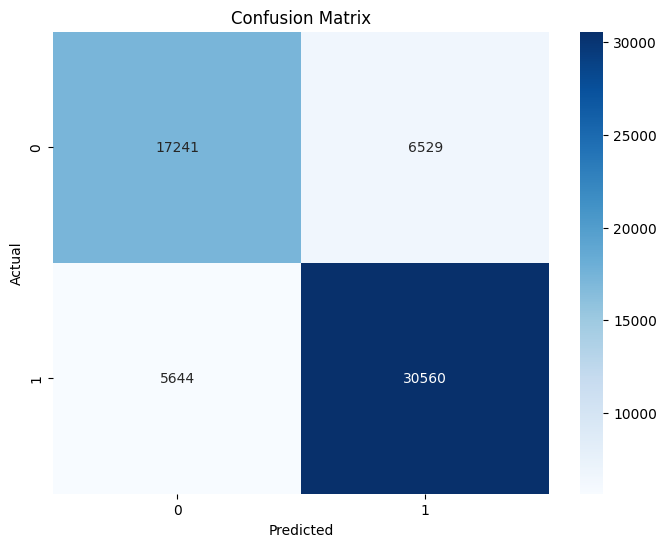

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Dissertation/mockup_labeled_data.csv')

print(data.isnull().sum())  # Check for any missing values

# Pre-process data
data = pre_process(data)

# Drop Null values
data.dropna(inplace=True)

# Define feature columns (X) and target column (y)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocessing the features

# For categorical variables, lets use OneHotEncoder, and for numerical, lets use StandardScaler.
categorical_features = ['student_country', 'preferred_contact_time', 'preferred_university',
                        'highest_qualification', 'destination_country', 'area_of_study',
                        'intro_source', 'app_used', 'sponsor', 'event_attended']

numerical_features = ['english_test_score', 'budget', 'time_to_study']

# Create a column transformer that applies OneHotEncoding to categorical variables and scaling to numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing to both training and testing data
X_train = preprocessor.fit_transform(X_train)  # Fit and transform training data
X_test = preprocessor.transform(X_test)  # Only transform testing data

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a pandas DataFrame to display the metrics in a table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [f"{accuracy * 100:.2f}%", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"]
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("\nModel Performance Metrics:")
print(metrics_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## XGBOOST Without Fine tuning

In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size shrinkage
    max_depth=4,           # Maximum depth of a tree
    subsample=0.8,         # Row sampling
    colsample_bytree=0.8,  # Feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    reg_lambda=5,          # L2 regularization
    gamma=1,               # Minimum loss reduction for splits
    )

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:05:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 97.14%
Confusion Matrix:
 [[22375  1395]
 [  320 35884]]


## XGBOOST With Parameter tuned


<ipython-input-3-4f0fddf58eba>:65: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'Application Submitted': 1, 'Application Not Submitted': 0})


    train-logloss-mean  train-logloss-std  test-logloss-mean  test-logloss-std
0             0.640587           0.000060           0.640679          0.000334
1             0.607920           0.000703           0.608118          0.000985
2             0.585756           0.000702           0.586070          0.001176
3             0.567306           0.000713           0.567724          0.001297
4             0.539014           0.000558           0.539527          0.001023
..                 ...                ...                ...               ...
95            0.155904           0.000571           0.159696          0.000684
96            0.154974           0.000590           0.158767          0.000675
97            0.153930           0.000557           0.157744          0.000686
98            0.152953           0.000527           0.156787          0.000679
99            0.152033           0.000572           0.155887          0.000638

[100 rows x 4 columns]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:54:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Performance Metrics:
      Metric   Score
0   Accuracy  98.18%
1  Precision    0.98
2     Recall    0.98
3   F1-score    0.98

Confusion Matrix:
[[22906   864]
 [  226 35978]]


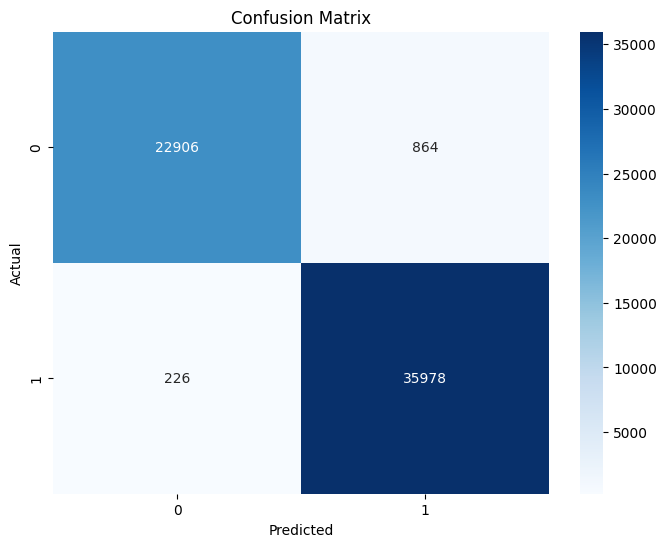

In [ ]:
from xgboost import XGBClassifier, cv, DMatrix
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dissertation/mockup_labeled_data.csv')

# Step 2: Check for missing values and preprocess the data
data.dropna(inplace=True)  # Drop rows with missing values for simplicity

data = pre_process(data)

# Step 3: Define feature columns (X) and target column (y)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Preprocessing the features
categorical_features = ['student_country', 'preferred_contact_time', 'preferred_university', 'highest_qualification', 'destination_country', 'area_of_study', 'intro_source', 'app_used', 'sponsor', 'event_attended']
numerical_features = ['english_test_score', 'budget', 'time_to_study']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 6: Define the parameter grid
param_grid = {
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'reg_lambda': 1,
    'objective': 'binary:logistic'
}

# Convert your training data to DMatrix
dtrain = DMatrix(X_train, label=y_train)

# Step 7: Perform cross-validation
cv_results = cv(
    params=param_grid,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=5,
    metrics='logloss',
    as_pandas=True,
    seed=42
)

print(cv_results)

# Step 8: Train the model with the best parameters
best_num_boost_round = cv_results['test-logloss-mean'].idxmin()
best_xgb_model = XGBClassifier(
    n_estimators=best_num_boost_round,
    max_depth=param_grid['max_depth'],
    learning_rate=param_grid['learning_rate'],
    subsample=param_grid['subsample'],
    colsample_bytree=param_grid['colsample_bytree'],
    gamma=param_grid['gamma'],
    reg_lambda=param_grid['reg_lambda'],
    objective=param_grid['objective'],
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb_model.fit(X_train, y_train)

# Step 9: Make predictions and evaluate the model
y_pred = best_xgb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a pandas DataFrame to display the metrics in a table
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Score': [f"{accuracy * 100:.2f}%", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"]
}

metrics_df = pd.DataFrame(metrics)

# Display the metrics table
print("\nModel Performance Metrics:")
print(metrics_df)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=best_xgb_model.classes_, yticklabels=best_xgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
metrics_df

,Metric,Score
0,Accuracy,98.18%
1,Precision,0.98
2,Recall,0.98
3,F1-score,0.98


For now best n_estimator has been found, and not able to use the GridSearchCV to find other best parameters due to some depedency issue with scikit learn and xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X)

# Evaluate accuracy
accuracy = accuracy_score(y, predictions)
print("Accuracy on the entire dataset:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'